In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
city_ride = pd.merge(city_data, ride_data, on="city")
# Display the data table for preview
city_ride.head()

city  driver_count   type                 date   fare        ride_id
0  Richardfort            38  Urban  2018-02-24 08:40:38  13.93  5628545007794
1  Richardfort            38  Urban  2018-02-13 12:46:07  14.00   910050116494
2  Richardfort            38  Urban  2018-02-16 13:52:19  17.92   820639054416
3  Richardfort            38  Urban  2018-02-01 20:18:28  10.26  9554935945413
4  Richardfort            38  Urban  2018-04-17 02:26:37  23.00   720020655850

## Bubble Plot of Ride Sharing Data

In [2]:
# Sort by city types
urban = city_ride.loc[city_ride["type"] == "Urban", :] 
suburban = city_ride.loc[city_ride["type"] == "Suburban", :]
rural = city_ride.loc[city_ride["type"] == "Rural", :]

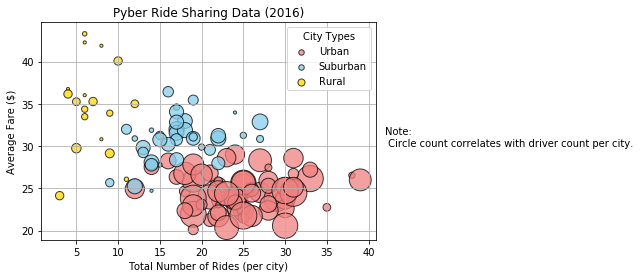

In [3]:
# Obtain the x and y coordinates for each of the three city types
# x total number of rides per city
# y average fare
# size = driver count per city
urban_x = urban.groupby('city')['ride_id'].count()
urban_y = urban.groupby('city')['fare'].mean()
urban_count = 10 *(urban.groupby('city')['driver_count'].mean())
suburban_x = suburban.groupby('city')['ride_id'].count()
suburban_y = suburban.groupby('city')['fare'].mean()
suburban_count = 10 *(suburban.groupby('city')['driver_count'].mean())
rural_x = rural.groupby('city')['ride_id'].count()
rural_y = rural.groupby('city')['fare'].mean()
rural_count = 10 *(rural.groupby('city')['driver_count'].mean())

# Build the scatter plots for each city types
# Urban
plt.scatter(urban_x, urban_y, marker="o", facecolors="lightcoral", edgecolors="black",
            s=urban_count, alpha=0.75, label='Urban')

# Suburban
plt.scatter(suburban_x, suburban_y, marker="o", facecolors="skyblue", edgecolors="black",
            s=suburban_count, alpha=0.75, label='Suburban')
# Rural
plt.scatter(rural_x, rural_y, marker="o", facecolors="gold", edgecolors="black",
            s=rural_count, alpha=0.75, label='Rural')

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (per city)")
plt.ylabel("Average Fare ($)")
plt.grid()

# Create a legend
legend = plt.legend(loc="best", title="City Types")
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(42, 30, s="Note: \n Circle count correlates with driver count per city.")

# Save Figure
plt.savefig("../Images/ScatterPlot.png")
# Show plot
plt.show()

## Total Fares by City Type

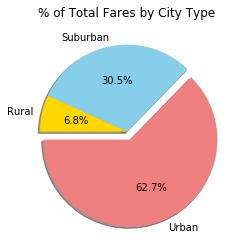

In [4]:
# Calculate Type Percents
# total fare for each city type
total_fare = city_ride['fare'].sum()
totalfare_urban = urban.groupby('type')['fare'].sum()
totalfare_suburban = suburban.groupby('type')['fare'].sum()
totalfare_rural = rural.groupby('type')['fare'].sum()
# get percentages
urban_percent = totalfare_urban/total_fare
suburban_percent = totalfare_suburban/total_fare
rural_percent = totalfare_rural/total_fare
fare_percentages = [urban_percent, suburban_percent, rural_percent]
# Build Pie Chart
labels = ["Urban", "Suburban", "Rural"]
colors = ["lightcoral", "skyblue", "gold"]
explode = (0.1,0,0)

plt.pie(fare_percentages, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180)
plt.title("% of Total Fares by City Type")
# Save Figure
plt.savefig("../Images/TotalFares.png")
# Show Figure
plt.show()

## Total Rides by City Type

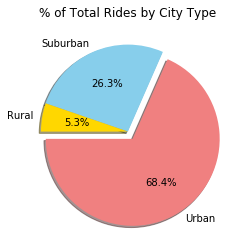

In [5]:
# Calculate Ride Percents
total_rides = city_ride['ride_id'].count()
totalrides_urban = urban.groupby('type')['ride_id'].count()
totalrides_suburban = suburban.groupby('type')['ride_id'].count()
totalrides_rural = rural.groupby('type')['ride_id'].count()

urban_ridespercent = totalrides_urban/total_rides
suburban_ridespercent = totalrides_suburban/total_rides
rural_ridespercent = totalrides_rural/total_rides
rides_percentages = [urban_ridespercent, suburban_ridespercent, rural_ridespercent]
# Build Pie Chart
labels = ["Urban", "Suburban", "Rural"]
colors = ["lightcoral", "skyblue", "gold"]
explode = (0.1,0,0)

plt.pie(rides_percentages, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("../Images/TotalRides.png")
# Show Figure
plt.show()

## Total Drivers by City Type

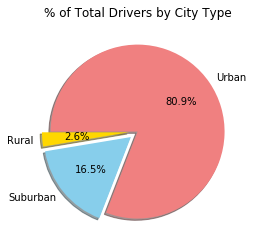

In [6]:
# Calculate Driver Percents
total_drivers = city_data['driver_count'].sum()
totaldrivers_citytype = city_data.groupby('type')['driver_count'].sum()
drivers_percent = totaldrivers_citytype/total_drivers

# Build Pie Charts
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "skyblue", "lightcoral"]
explode = (0.1,0.1,0)

plt.pie(drivers_percent, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("../Images/TotalDrivers.png")
# Show Figure
plt.show()

In [7]:
print("According to the results illustrated in the scatterplot and pie charts, rural cities have less rides and higher fares than suburban and urban cities. Urban cities have a higher number of rides and lower fares than rural and suburban cities. According to the “% of Total Drivers by City Type” pie chart, 80.9% of Pyber drivers conduct rides in urban cities.")

According to the results illustrated in the scatterplot and pie charts, rural cities have less rides and higher fares than suburban and urban cities. Urban cities have a higher number of rides and lower fares than rural and suburban cities. According to the “% of Total Drivers by City Type” pie chart, 80.9% of Pyber drivers conduct rides in urban cities.
